# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

In [369]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import re

# загрузим данные
data = pd.read_csv('netflix_titles.csv')
data.drop(['date_added','description'], axis='columns', inplace=True) # Удалим лишние столбцы, чтобы облегчить таблицу
data

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


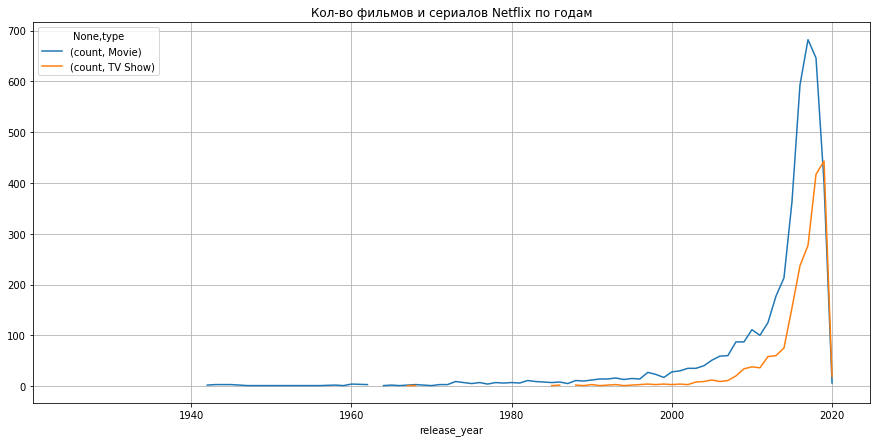

In [238]:
# График 1 - Кол-во фильмов и сериалов Netflix по годам
graph1 = data.groupby(['release_year','type']).agg(['count'])['show_id'].sort_values('release_year')
graph1.unstack('type').plot(title='Кол-во фильмов и сериалов Netflix по годам', grid=True)
# Как можно увидеть на графике вплоть до 2019 года кол-во показываемых на Netflix фильмов было больше чем сериалов,
# но в 2019 году их кол-во стало равно. По 2020 году еще мало информации, поэтому в конце графика такой спад 

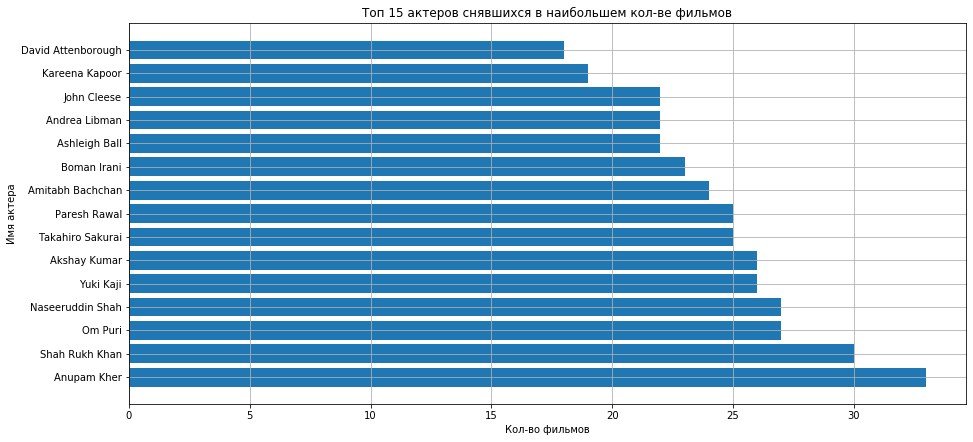

In [331]:
# График 2 - Актеры снявшиеся с наибольшем кол-ве фильмов и сериалов
actors = {}
movies = data['cast'].dropna().apply(lambda x: x.split(", "))
for movie in movies:
    for actor in movie:
        if actor not in actors: actors[actor]=0
        actors[actor]+=1

graph2 = pd.DataFrame.from_dict(actors, orient='index', columns=['count']).reset_index()
graph2 = graph2.sort_values('count', ascending=False).head(15)

plt.barh(graph2['index'], graph2['count'])
plt.xlabel('Кол-во фильмов')
plt.ylabel('Имя актера')
plt.title('Топ 15 актеров снявшихся в наибольшем кол-ве фильмов')
plt.grid()

# Как можно увидеть по графику, в топ 15 присутствуют приемущественно индийские имена, что скорее всего связязано с быстрыми
# съемками и запуском фильмов и сериалов в производство в Индии, по сравнению с западными сериалами и фильмами

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

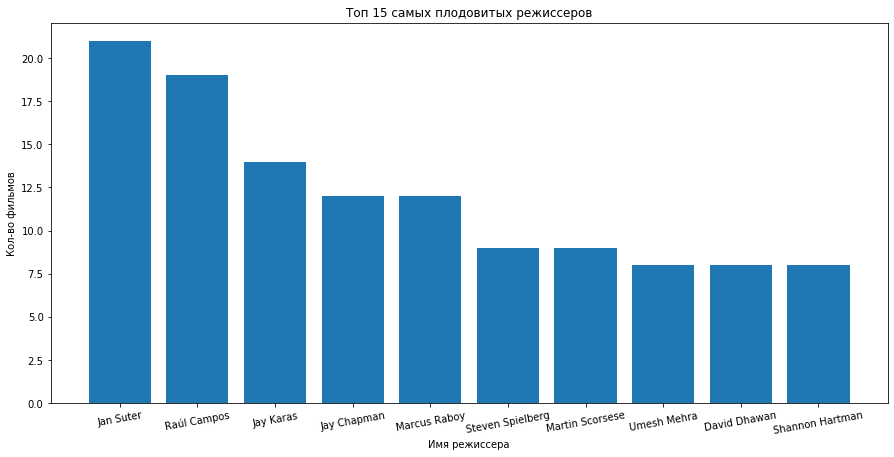

In [392]:
# График 3 - Топ 15 самых плодовитых режиссеров 
directors = {}
movies = data['director'].dropna().apply(lambda x: x.split(", "))
for movie in movies:
    for director in movie:
        if director not in directors: directors[director]=0
        directors[director]+=1
        
graph3 = pd.DataFrame.from_dict(directors, orient='index', columns=['count'])
graph3 = graph3.sort_values('count', ascending=False).reset_index().head(10)
plt.bar(graph3['index'], graph3['count'])
plt.xlabel('Имя режиссера')
plt.ylabel('Кол-во фильмов')
plt.title('Топ 15 самых плодовитых режиссеров')
plt.xticks(rotation=10)
# Здесь мы также можем увидеть, что самые плодовитые режиссеры у которых 23 и более фильмов происходят из Индии,
# что также подтверждает предыдущую гипотезу, что производство фильмов и сериалов в Индии процесс более быстрый и простой
# по сравнению с другими странами мира

In [394]:
# График 4 - чтобы доказать выдвинутые выше 2 гипотезы, построим график с самыми продуктивными странами в производстве
countries = {}

def prepare(country1, type1):
    ctrs = country1.split(", ")
    for ctr in ctrs:
        if ctr not in countries: countries[ctr]=0
        countries[ctr]+=1        

data.dropna(inplace=True)
graph4 = data.apply(lambda x: prepare(x['country'], x['type']), axis=1)
countries

{'United States': 1718,
 'India': 762,
 'South Korea': 52,
 'China': 79,
 'Bulgaria': 8,
 'Spain': 120,
 'Canada': 194,
 'Chile': 19,
 'United Kingdom': 341,
 'Denmark': 24,
 'Sweden': 19,
 'Netherlands': 25,
 'Belgium': 54,
 'France': 191,
 'Thailand': 36,
 'Pakistan': 20,
 'Turkey': 66,
 'Brazil': 40,
 'Italy': 40,
 'Indonesia': 49,
 'Hong Kong': 91,
 'Morocco': 5,
 'Vietnam': 4,
 'Argentina': 50,
 'Nigeria': 35,
 'Greece': 4,
 'Norway': 11,
 'Ireland': 21,
 'Switzerland': 13,
 'United Arab Emirates': 20,
 'Japan': 80,
 'Cambodia': 3,
 'Russia': 5,
 'Mexico': 78,
 'Israel': 15,
 'Germany': 113,
 'Australia': 67,
 'Portugal': 4,
 'Egypt': 44,
 'Taiwan': 12,
 'Austria': 7,
 'Soviet Union': 3,
 'Peru': 7,
 'Uruguay': 5,
 'Malaysia': 14,
 'South Africa': 23,
 'Nepal': 2,
 'Philippines': 45,
 'Poland': 20,
 'Serbia': 5,
 'Singapore': 17,
 'Luxembourg': 7,
 'Cayman Islands': 1,
 'New Zealand': 13,
 'Venezuela': 1,
 'Jordan': 4,
 'Saudi Arabia': 1,
 'Iceland': 5,
 'Poland,': 1,
 'West Germa

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.